In [ ]:
### https://www.kaggle.com/datasets/ybifoundation/handlingmissingvalues

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [294]:
df = pd.read_csv('dataset/people.csv', na_values=['?','#','**'])
df

,Gender,Married,Age,Graduat,Profession,Experience,SpendingScore,FamilySize
0,Male,No,22.0,No,Healthcare,1.0,Low,NaN
1,NaN,Yes,38.0,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,NaN,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,NaN,Yes,Lawyer,0.0,High,2.0
4,NaN,Yes,40.0,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22.0,No,NaN,0.0,Low,7.0
8064,Male,No,35.0,No,Executive,3.0,Low,4.0
8065,Female,No,33.0,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27.0,Yes,Healthcare,1.0,Low,4.0


In [295]:
df.isnull().sum()

Gender            12
Married          140
Age               14
Graduat           78
Profession       124
Experience       829
SpendingScore      0
FamilySize       336
dtype: int64

In [296]:
def check_datatypes(df):
    for col in df.columns:
        if (df[col].dtype == "bool"):
            df[col] = df[col].astype('string')
            df[col] = df[col].astype('object')
    return df

def injection(dataset, seed, name_class):

    np.random.seed(seed)
    df_dirt = dataset.copy()

    df_dirt = check_datatypes(df_dirt)

    rand = np.random.randint(3, size=(df.shape[0],df.shape[1]))

    for i in range(0,len(df.columns)):
        if df.columns[i] != name_class:
            df_dirt.loc[rand[:, i] == 1, df.columns[i]] = np.nan

    return df_dirt

In [297]:
df_null = injection(df, 1, 'Married')

In [298]:
df_null.isnull().sum()

Gender           2721
Married           140
Age              2669
Graduat          2813
Profession       2719
Experience       3187
SpendingScore    2783
FamilySize       2855
dtype: int64

In [299]:
df_null.isnull().sum().sum()/df_null.shape[0]*df_null.shape[1]

np.float64(19.71938522558255)

In [300]:
df = df_null.copy()

In [301]:
NUM = list(df.select_dtypes(include=['int64','float64']).columns)

In [302]:
NUM

['Age', 'Experience', 'FamilySize']

Age


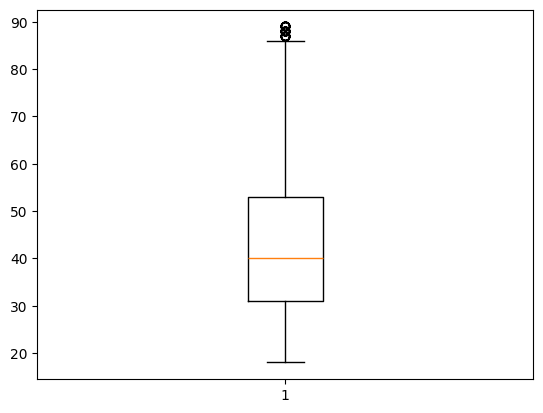

Experience


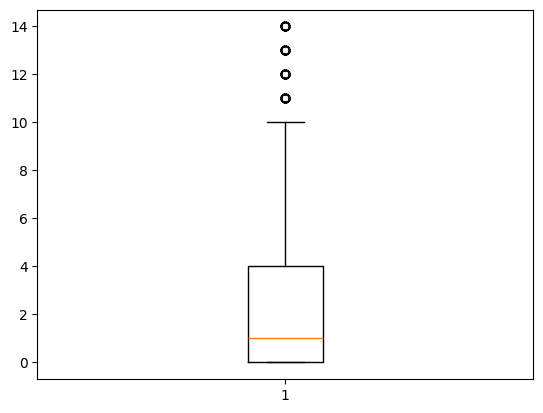

FamilySize


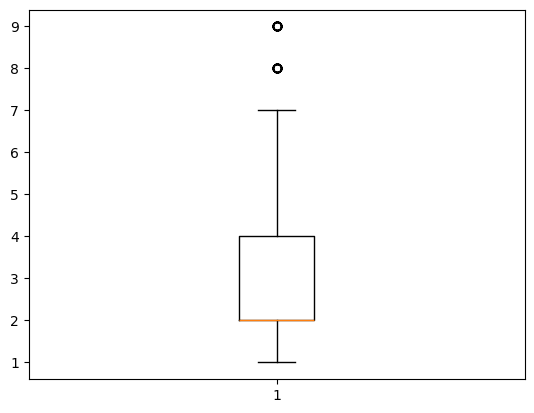

In [303]:
for col in NUM:
    print(col)
    plt.boxplot(df[col].dropna())
    plt.show()


In [304]:
import scripts.algorithms_class as a


In [305]:
df = df_null.copy()

In [306]:
df.columns

Index(['Gender', 'Married', 'Age', 'Graduat', 'Profession', 'Experience',
       'SpendingScore', 'FamilySize'],
      dtype='object')

In [307]:
df.Married.value_counts()

Married
Yes    4643
No     3285
Name: count, dtype: int64

In [308]:
cols = ['Gender', 'Age', 'Graduat', 'Profession', 'Experience',
        'SpendingScore', 'FamilySize']
target = ['Married']

In [309]:
df = df[df['Married'].notna()]

In [310]:
a.classification(df[cols], df[target], 'RandomForest', 250, 4)


Training for RandomForest...
0.823329359364195


np.float64(0.823329359364195)

In [311]:
df.isnull().sum().sum()/df.shape[0]*df.shape[1]

np.float64(19.58425832492432)

In [312]:
for col in df.columns:
    print(col)
    print(df[col].isnull().sum()/len(df))

Gender
0.3377901109989909
Married
0.0
Age
0.3307265388496468
Graduat
0.34926841574167505
Profession
0.33690716448032293
Experience
0.39455095862764883
SpendingScore
0.34485368314833503
FamilySize
0.35393541876892026


In [313]:
df.to_csv('dataset/people.csv',index=False)

In [314]:
df = pd.read_csv("dataset/people.csv")
name_class = 'Married'
selected_features = ['Gender', 'Age', 'Graduat', 'Profession', 'Experience',
        'SpendingScore', 'FamilySize', name_class]
selected_features_only = ['Gender', 'Age', 'Graduat', 'Profession', 'Experience',
        'SpendingScore', 'FamilySize']
df = df[selected_features]

In [315]:
models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

In [325]:
for i in [100, 150, 200, 250, 300]:
    a.classification(df[selected_features_only], df[name_class], 'AdaBoost', i, 4)

Training for AdaBoost...
0.8372018954314824
Training for AdaBoost...
0.83083008084166
Training for AdaBoost...
0.8369184594357943
Training for AdaBoost...
0.8387265176381474
Training for AdaBoost...
0.8367497089110327


In [327]:
param = {
    'DecisionTree': 200,
    'LogisticRegression': 1,
    'KNN': 30,
    'RandomForest': 250,
    'AdaBoost': 100,
    'SVC': 1
}

for m in models:
    a.classification(df[selected_features_only], df[name_class], m, param[m], 4)

Training for DecisionTree...
0.7869767219384127
Training for LogisticRegression...
0.8261686643272952
Training for KNN...
0.7984707248112525
Training for RandomForest...
0.8099274505380798
Training for AdaBoost...
0.8333983209673936
Training for SVC...
0.5983935875560802
